<a href="https://colab.research.google.com/github/BonnieChester/GSM-KU-Workshop/blob/main/WS_data_analysis_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 读取数据
file_path = '/content/drive/My Drive/WS/Summary by 6 facets_for analysis.xlsx'  # 修改为你的文件路径
data = pd.read_excel(file_path)

In [ ]:
# 特征列
X_1 = data[['Intrapersonal', 'Artistic', 'Interactive', 'Intrinsic', 'Interpersonal', 'Mechanical']]
X_2 = data[['Intrapersonal1', 'Artistic1', 'Interactive1', 'Intrinsic1', 'Interpersonal1', 'Mechanical1']]
X_3 = data[['Intrapersonal2', 'Artistic2', 'Interactive2', 'Intrinsic2', 'Interpersonal2', 'Mechanical2']]

# 目标列<ctrl3
y = data['Positive rate']

# 建立并拟合多重线性回归模型
model_1 = LinearRegression()
model_1.fit(X_1, y)

model_2 = LinearRegression()
model_2.fit(X_2, y)

model_3 = LinearRegression()
model_3.fit(X_3, y)

# 打印系数和截距
print("Coefficients1:", model_1.coef_)
print("Intercept1:", model_1.intercept_)

print("Coefficients2:", model_2.coef_)
print("Intercep2t:", model_2.intercept_)

print("Coefficients3:", model_3.coef_)
print("Intercept3:", model_3.intercept_)

Coefficients1: [ 66.44075884 -17.36697035   4.55853817  -3.63560531 -93.93837661
  40.0085393 ]
Intercept1: 4.3415200966463425
Coefficients2: [ 0.00300464  0.00101605  0.00163377 -0.0018233  -0.00232803 -0.00187644]
Intercep2t: 1.412172193146328
Coefficients3: [ 28.95774215  -2.04481952  -0.64719421  -1.97285185 -38.97281322
  20.14844954]
Intercept3: -4.550325209548016


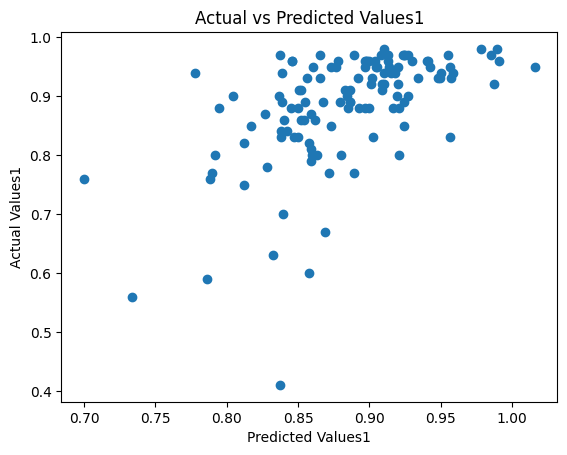

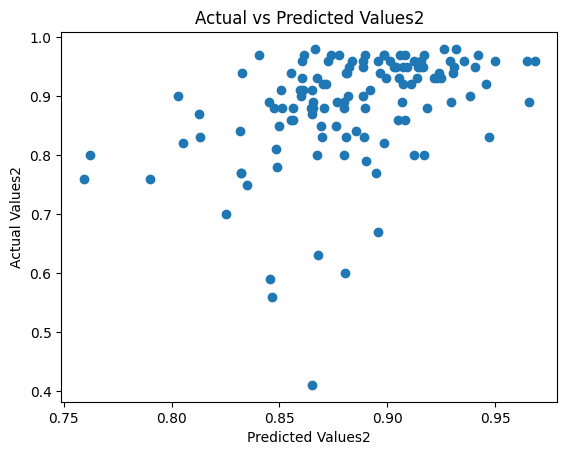

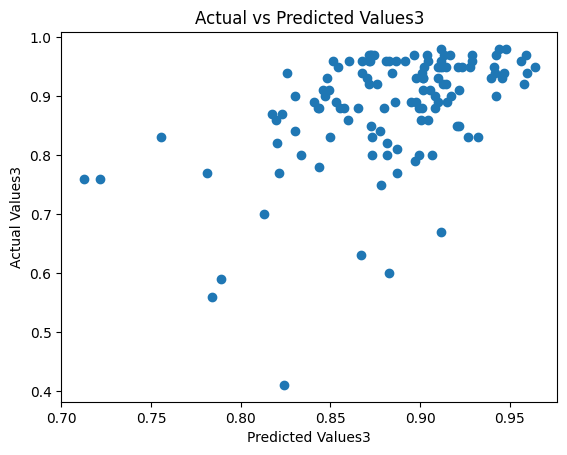

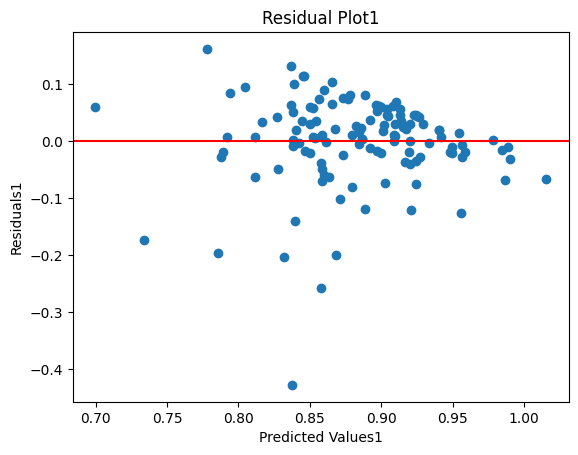

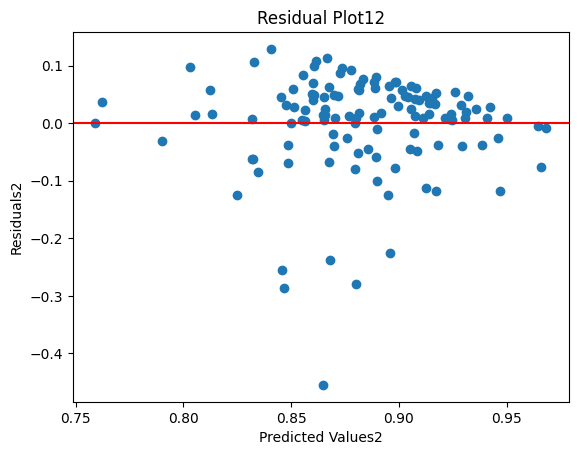

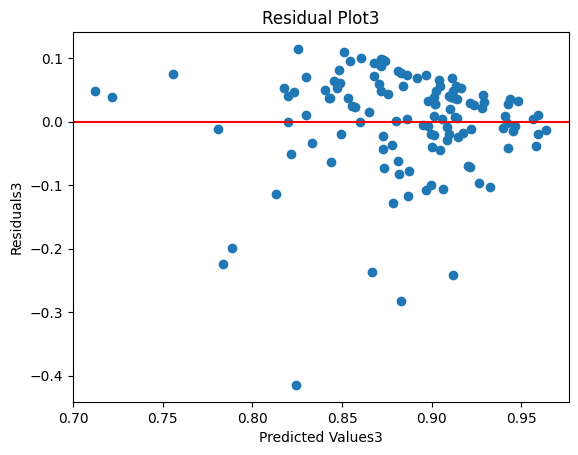

In [ ]:
# 预测值
y_pred_1 = model_1.predict(X_1)
y_pred_2 = model_2.predict(X_2)
y_pred_3 = model_3.predict(X_3)

# 绘制预测值和真实值的散点图
plt.scatter(y_pred_1, y)
plt.xlabel('Predicted Values1')
plt.ylabel('Actual Values1')
plt.title('Actual vs Predicted Values1')
plt.show()

plt.scatter(y_pred_2, y)
plt.xlabel('Predicted Values2')
plt.ylabel('Actual Values2')
plt.title('Actual vs Predicted Values2')
plt.show()

plt.scatter(y_pred_3, y)
plt.xlabel('Predicted Values3')
plt.ylabel('Actual Values3')
plt.title('Actual vs Predicted Values3')
plt.show()
# 计算残差
residuals_1 = y - y_pred_1
residuals_2 = y - y_pred_2
residuals_3 = y - y_pred_3

# 绘制残差图
plt.scatter(y_pred_1, residuals_1)
plt.xlabel('Predicted Values1')
plt.ylabel('Residuals1')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot1')
plt.show()

plt.scatter(y_pred_2, residuals_2)
plt.xlabel('Predicted Values2')
plt.ylabel('Residuals2')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot12')
plt.show()

plt.scatter(y_pred_3, residuals_3)
plt.xlabel('Predicted Values3')
plt.ylabel('Residuals3')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot3')
plt.show()

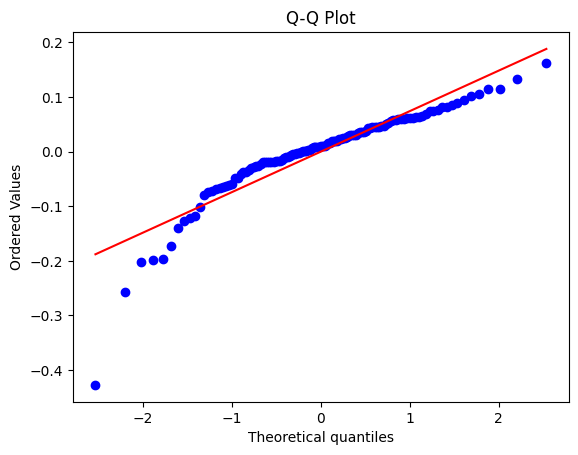

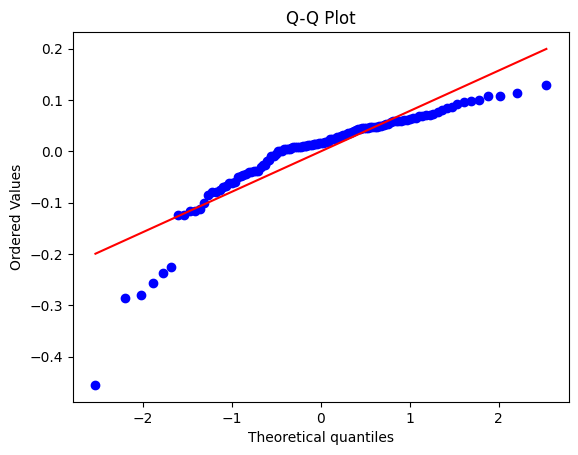

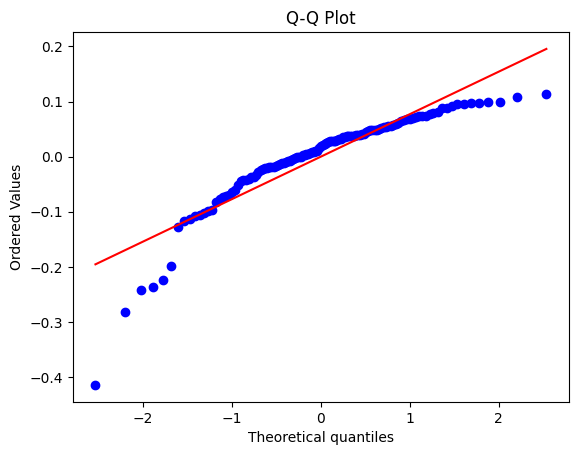

In [ ]:
# 绘制 Q-Q 图
stats.probplot(residuals_1, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

stats.probplot(residuals_2, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

stats.probplot(residuals_3, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [ ]:
import numpy as np

# 计算置信区间
alpha = 0.05  # 置信水平
z_score = stats.norm.ppf(1 - alpha / 2)  # z 分数

def calculate_confidence_interval(residuals):
  # 计算标准误差
  std_error = np.std(residuals) / np.sqrt(len(residuals))

  # 计算置信区间上下限
  lower_limit = np.mean(residuals) - z_score * std_error
  upper_limit = np.mean(residuals) + z_score * std_error
  return lower_limit, upper_limit

# 计算并打印置信区间
ci_1 = calculate_confidence_interval(residuals_1)
ci_2 = calculate_confidence_interval(residuals_2)
ci_3 = calculate_confidence_interval(residuals_3)

print(f"95% 置信区间 1:{ci_1}")
print(f"95% 置信区间 2:{ci_2}")
print(f"95% 置信区间 3:{ci_3}")


95% 置信区间 1:(-0.013942274927783762, 0.013942274927812826)
95% 置信区间 2:(-0.015278919860318839, 0.015278919860318617)
95% 置信区间 3:(-0.014631163696101727, 0.014631163696122818)


In [ ]:
from sklearn.metrics import r2_score

# 计算 R²<ctrl
r_squared_1 = r2_score(y, y_pred_1)
r_squared_2 = r2_score(y, y_pred_2)
r_squared_3 = r2_score(y, y_pred_3)

print(f"R²-1: {r_squared_1}")
print(f"R²-2: {r_squared_2}")
print(f"R²-3: {r_squared_3}")

R²-1: 0.3066965675394553
R²-2: 0.1673904812552206
R²-3: 0.2364916267022371


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
# 添加常数项
X_1 = sm.add_constant(X_1)
X_2 = sm.add_constant(X_2)
X_3 = sm.add_constant(X_3)

# 拟合多重线性回归模型
model1 = sm.OLS(y, X_1).fit()
model2 = sm.OLS(y, X_2).fit()
model3 = sm.OLS(y, X_3).fit()

# 打印模型摘要
print(model1.summary())
print(model2.summary())
print(model3.summary())

# 计算 F 统计量
f_stat_1 = model1.fvalue
f_stat_2 = model2.fvalue
f_stat_3 = model3.fvalue

# 打印 F
print(f"F-1: {f_stat_1}")
print(f"F-2: {f_stat_2}")
print(f"F-3: {f_stat_3}")

# 计算 p 值
p_value_1 = model1.f_pvalue
p_value_2 = model2.f_pvalue
p_value_3 = model3.f_pvalue

# 打印
print(f"p-1: {p_value_1}")
print(f"p-2: {p_value_2}")
print(f"p-3: {p_value_3}")

# 计算 R²
r_squared_1 = model1.rsquared
r_squared_2 = model2.rsquared
r_squared_3 = model3.rsquared

                            OLS Regression Results                            
Dep. Variable:          Positive rate   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     8.552
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.07e-07
Time:                        05:23:25   Log-Likelihood:                 137.85
No. Observations:                 123   AIC:                            -261.7
Df Residuals:                     116   BIC:                            -242.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.3415      3.206      1.354